In [1]:
import numpy as np
import os

In [2]:
cwd = os.getcwd()

In [3]:
os.listdir(path='.')

['.DS_Store',
 '.ipynb_checkpoints',
 '1. Network Data',
 '2. Demographics and Outcomes',
 '3. Saved Graphs',
 'Demographic_Analysis-roberto-81jb-2-roberto-81jb.ipynb',
 'Demographic_Analysis-roberto-81jb-2.ipynb',
 'Demographic_Analysis-roberto-81jb-3.ipynb',
 'Demographic_Analysis-roberto-81jb.ipynb',
 'Demographic_Analysis.ipynb',
 'Graph_Viz-roberto-ideapad.ipynb',
 'Graph_Viz.ipynb',
 'Graph_importer-roberto-81jb.ipynb',
 'Graph_importer.ipynb',
 'graph_village-roberto-81jb.ipynb',
 'graph_village.ipynb']

In [4]:
path = '1. Network Data/Adjacency Matrices'
file1 =  'adj_allVillageRelationships_HH_vilno_1.csv'
file2 = 'adj_allVillageRelationships_vilno_1.csv'
file3 = 'adj_andRelationships_vilno_1.csv'
file4 = 'adj_borrowmoney_vilno_1.csv'
file5 = 'adj_lendmoney_vilno_1.csv'

In [5]:
os.chdir(os.path.join(cwd,path))

In [6]:
file4

'adj_borrowmoney_vilno_1.csv'

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
input_data = pd.read_csv(file2, index_col = 0)
G = nx.Graph(input_data.values)

### All Village Relationship (Union) - G 

In [8]:
spring_pos = nx.spring_layout(G)

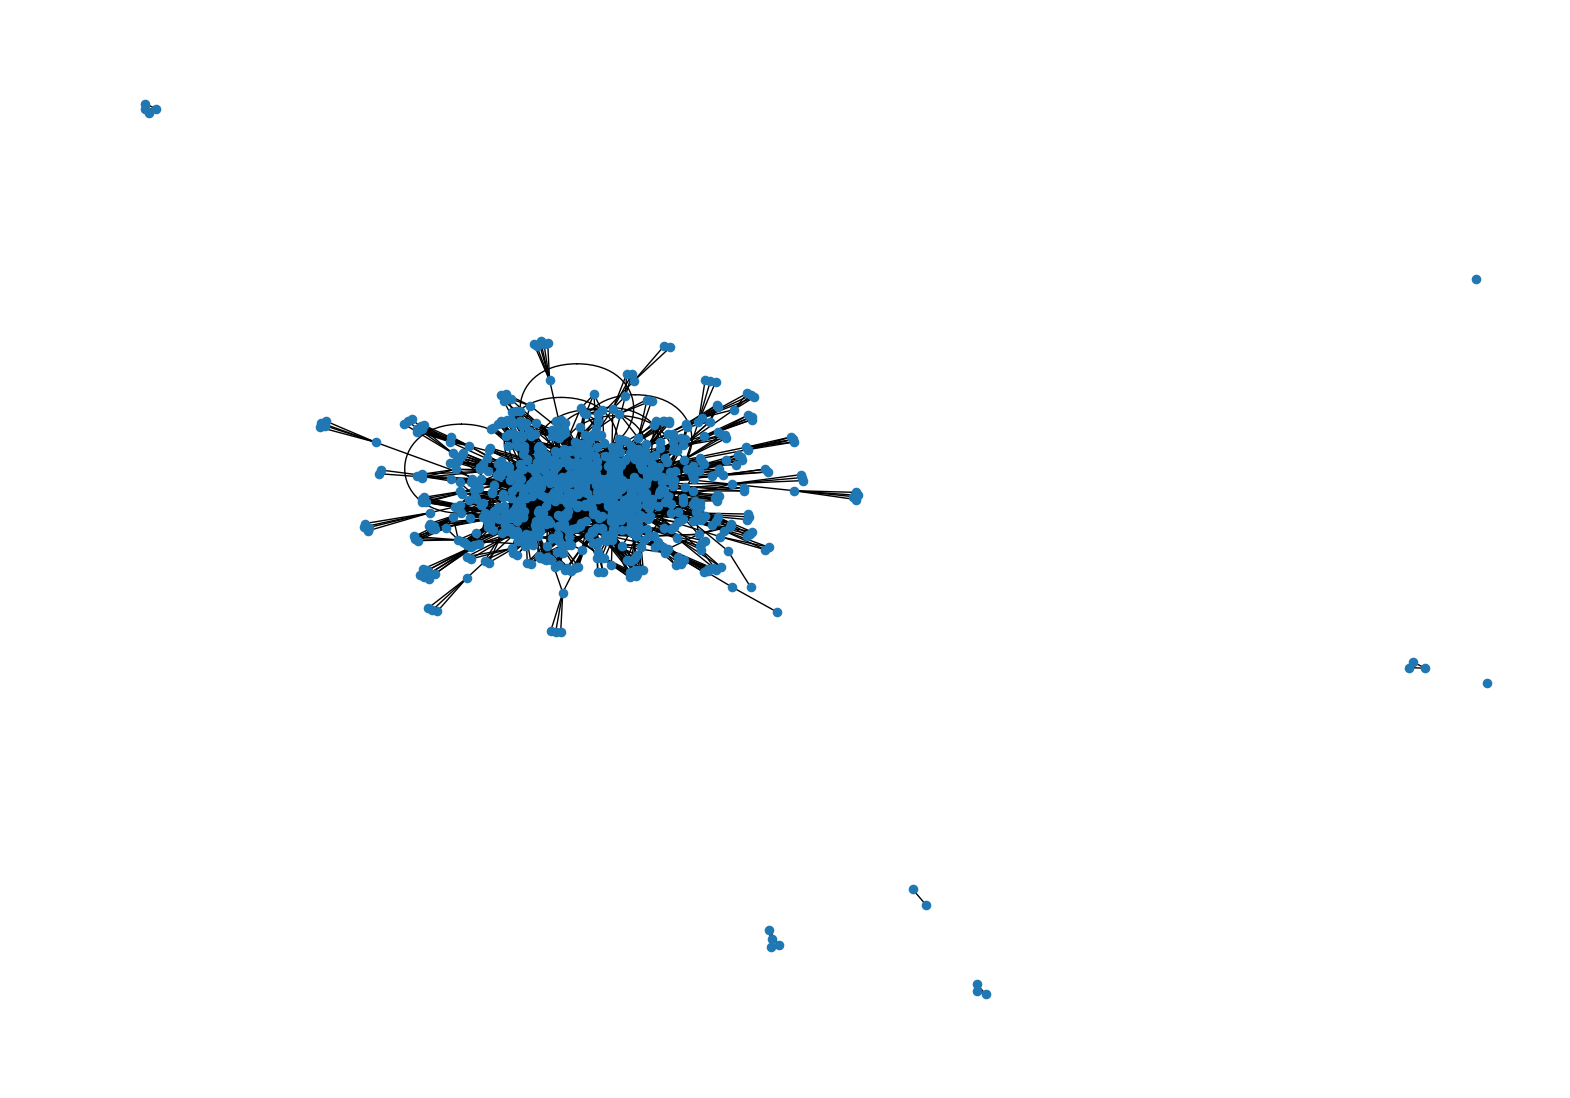

In [9]:
plt.figure(figsize=(20,14))
plt.axis("off")
nx.draw_networkx(G,pos = spring_pos, with_labels = False, node_size=35, node_color='#1f78b4')

In [10]:
G.number_of_nodes()

842

In [11]:
G.number_of_edges()

3397

### Adj and Relationship (Intersection)  - H

In [12]:
input_data = pd.read_csv(file3, index_col = 0)
H = nx.Graph(input_data.values)

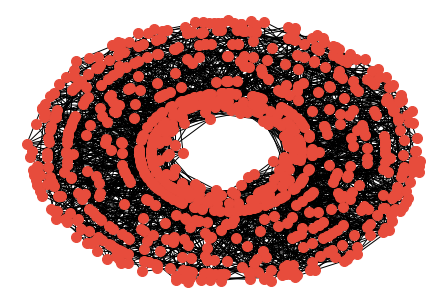

In [13]:
nx.draw_kamada_kawai(H,node_size=100, node_color='#e74c3c')
plt.show()

In [13]:
H.number_of_nodes()

842

In [14]:
H.number_of_edges()

1846

### Borrow Money from (B) 

In [16]:
input_data = pd.read_csv(file4, index_col = 0)
B = nx.Graph(input_data.values)

In [17]:
from numpy import genfromtxt
import numpy as np
mydata = genfromtxt(file4, delimiter=',')
print(mydata)
print(type(mydata))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
<class 'numpy.ndarray'>


In [18]:
(m,n) = mydata.shape

In [19]:
m

843

In [20]:
teste = mydata
for i in range (0,m-1):
    for j in range (0,m-1):
        if teste[i,j]==1:
            teste[j,i]=0

In [21]:
print(teste.shape)

(843, 843)


In [22]:
gr = nx.DiGraph(teste)
gr.add_edges_from(edges)
plt.figure(figsize=(20,14))
nx.draw_kamada_kawai(gr,node_size=100, node_color='#34495e')
plt.show()

NameError: name 'edges' is not defined

In [23]:
gr.number_of_nodes()

843

In [24]:
gr.number_of_edges()

2152

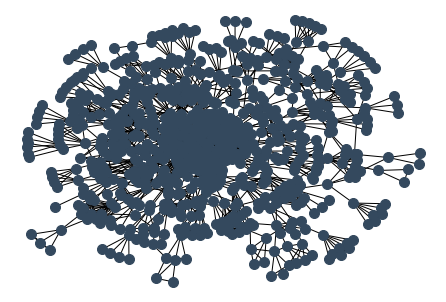

In [25]:
nx.draw_kamada_kawai(B,node_size=100, node_color='#34495e')
plt.show()

In [26]:
B.number_of_nodes()

842

In [27]:
B.number_of_edges()

2146

### Lend Money to (L)

In [28]:
input_data = pd.read_csv(file5, index_col = 0)
L = nx.Graph(input_data.values)

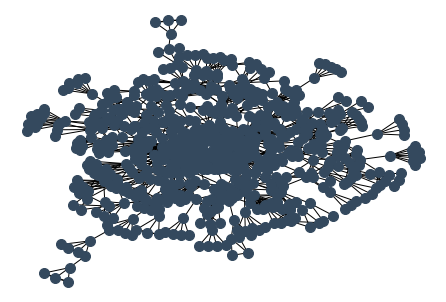

In [29]:
nx.draw_kamada_kawai(L,node_size=100, node_color='#34495e')
plt.show()

In [30]:
L.number_of_nodes()

842

In [31]:
L.number_of_edges()

2122

### Other Visualizations 

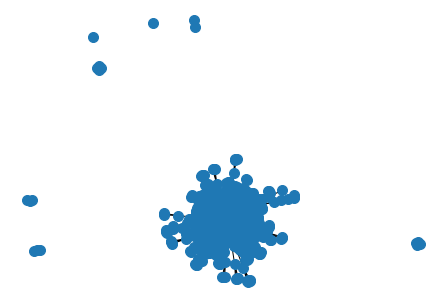

In [32]:
nx.draw_spring(G,node_size=100, node_color='#1f78b4')
plt.show()

In [33]:
# Number of connected components
nx.number_connected_components(G)

8

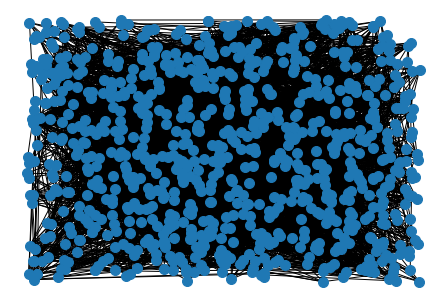

In [34]:
nx.draw_random(G,node_size=100, node_color='#1f78b4')
plt.show()

### Network Analysis - Basics

In [35]:
G.number_of_nodes()

842

In [36]:
G.number_of_edges()

3397

In [37]:
# Number of Nodes with zero degree
count = 0
for v in G.nodes():
    if (G.degree(v) == 0):
        count += 1
print(count)

2


In [38]:
# Number of Nodes with degree <= 10
count = 0
for v in G.nodes():
    if (G.degree(v) <= 10):
        count += 1
print(count)

634


In [39]:
# Number of Nodes with degree > 10
count = 0
for v in G.nodes():
    if (G.degree(v) > 10):
        count += 1
print(count)

208


In [40]:
m = nx.degree_centrality(G)

In [41]:
sorted(m, key=m.get, reverse=True)[:5]

[793, 352, 399, 160, 475]

In [42]:
from collections import Counter
dict(Counter(m).most_common(5))

{793: 0.06420927467300831,
 352: 0.05707491082045184,
 399: 0.04637336504161712,
 160: 0.04161712247324613,
 475: 0.04161712247324613}

In [43]:
page_rank = nx.pagerank(G)

In [44]:
sorted(page_rank, key=page_rank.get, reverse=True)[:5]

[793, 352, 399, 160, 475]

In [45]:
dict(Counter(page_rank).most_common(5))

{793: 0.005813217596872655,
 352: 0.0052391240709459535,
 399: 0.0045868389886874784,
 160: 0.0040117717527247115,
 475: 0.003910228238634386}

## Plot the distribution of out-degrees of nodes in the network on a log-log scale

In [46]:
degree_sequence = [d for n, d in G.degree()]

In [47]:
dist = {}
for d in degree_sequence:
    if d in dist:
        dist[d] += 1
    else:
        dist[d] = 1

In [48]:
x = []
y = []
for d in dist:
    if d>0:
        x.append(d)
        y.append(dist[d])

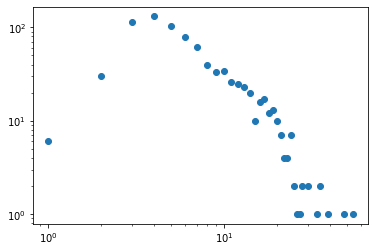

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.add_axes()
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()